In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_instance = LabelEncoder()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 4K_House_Rent_Dataset.csv to 4K_House_Rent_Dataset.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['4K_House_Rent_Dataset.csv']))
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
data.shape

(4746, 12)

In [ ]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [ ]:
Y = data['Rent'].values
X1 = data['Size'].values
X2 = data['BHK'].values
X3 = data['Bathroom'].values
X4 = data['Furnishing Status'].values
X5 = data['City'].values

In [ ]:
# Convert categorical string data to numeric
def data_conversion(column):
  return label_encoder_instance.fit_transform(column)

In [ ]:
pre_X4 = X4
pre_X5 = X5

In [ ]:
X4 = data_conversion(pre_X4)
X5 = data_conversion(pre_X5)
print(pre_X4[:15], X4[:15],pre_X5[520:530], X5[520:530])

['Unfurnished' 'Semi-Furnished' 'Semi-Furnished' 'Unfurnished'
 'Unfurnished' 'Unfurnished' 'Unfurnished' 'Unfurnished' 'Unfurnished'
 'Semi-Furnished' 'Semi-Furnished' 'Unfurnished' 'Furnished' 'Unfurnished'
 'Unfurnished'] [2 1 1 2 2 2 2 2 2 1 1 2 0 2 2] ['Kolkata' 'Kolkata' 'Kolkata' 'Kolkata' 'Mumbai' 'Mumbai' 'Mumbai'
 'Mumbai' 'Mumbai' 'Mumbai'] [4 4 4 4 5 5 5 5 5 5]


In [ ]:
def calculate_model_parameter(X, Y, epoch, learning_rate, num_of_cols_in_feature_vec):
  m = len(X)

  thetas = np.zeros((num_of_cols_in_feature_vec))
  cost = np.zeros((num_of_cols_in_feature_vec))
  for i in range(epoch):
    print(cost)
    y_predict = np.matmul(X,thetas)
    for j in range(num_of_cols_in_feature_vec):
      thetas[j] -=  (learning_rate/m) * np.sum(np.multiply(y_predict - Y, X[:,j]))
    cost = 0.5/m * np.sum(np.square(np.matmul(X,thetas) - Y))
  return thetas;

In [ ]:
 X = np.array([[x0,x1,x2,x3,x4,x5] for x0,x1,x2,x3,x4,x5 in zip(np.ones(len(Y)),X1,X2,X3,X4,X5)])
thetas = calculate_model_parameter(X, Y, 600000, 0.00000105, X.shape[1])
# X.shape[1]

In [ ]:
def predict_rent(thetas, parameters):
  predicted_value = np.matmul(thetas, parameters)
  return predicted_value;

##Mappings
```
{'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}
{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
features = [const, Size, BHK, Bathroom, Furnishing Status, City]
```

In [ ]:
predict_rent(thetas, [1, 1100, 2, 2, 0, 1])

45248.9202519692

In [ ]:
max_x = np.max(X1)
min_x = np.min(X1)
max_x, min_x

(8000, 10)

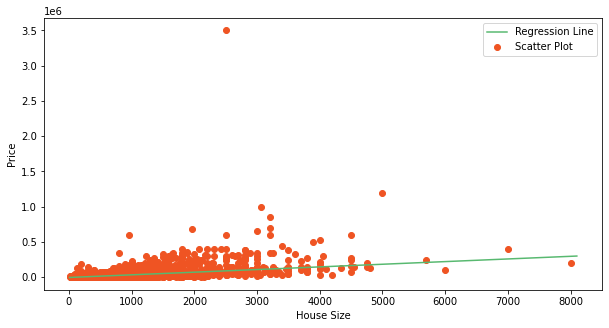

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

max_x = np.max(X1) + 100
min_x = np.min(X1)
x = np.linspace(min_x, max_x, 1000)
yy = thetas[1] * x + thetas[0]
plt.plot(x, yy, color='#58b970', label='Regression Line')
plt.scatter(X1, Y, c = "#ef5423", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()